#Adding date of transformation to dataset and splitting into unqiue/repeat users

In [2]:
import sys
sys.path.append('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')
import redditDataIO
import pandas as pd
import numpy as np
import os
os.chdir('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')

In [3]:
fullWeightLossData = redditDataIO.loadData('combinedSentiment')
fullWeightLossData['weightChange'] = fullWeightLossData['weightChange']*-1
fullWeightLossData.head()

,index,permalink,userText,name,author,url,num_comments,endWeight,title,created_utc,...,currentBMI,previousBMI,timeElapsedEpoch,timeElapsedMonths,weightChangeRate,username,fitnessCommentCount,totalCommentCount,fitnessCommentFraction,sentimentScores
0,0,/r/progresspics/comments/1ak3q9/m2260_my_girlf...,", 202 to 187. Planning on losing a few more, t...",t3_1ak3q9,BrovietUnion1,http://imgur.com/a/JErVf,36,187,"[M/22/6'0""] My girlfriend said I was getting f...",1363650000,...,25.9722,28.0556,4838400,1.86667,-8.035710,BrovietUnion1,34,46,0.739130,0
1,1,/r/progresspics/comments/1fay80/update_m2260_2...,. Final progress pics. Girlfriend said I was g...,t3_1fay80,BrovietUnion1,http://imgur.com/a/UEu89,29,177,"Update: M/22/6'0"", 202 to 177lbs in 20 weeks. ...",1369870000,...,24.5833,28.0556,12096000,4.66667,-5.357140,BrovietUnion1,34,46,0.739130,3
2,2,/r/progresspics/comments/2owbfv/update_m2460_1...,"later, got fat again! My girlfriend broke up ...",t3_2owbfv,BrovietUnion1,http://i.imgur.com/a5T6Axx.jpg,17,185,"Update [M/24/6'0""]: 1.5 years later, got fat a...",1418240000,...,25.6944,27.0833,47256000,18.23150,-0.548502,BrovietUnion1,34,46,0.739130,1
3,3,/r/progresspics/comments/1atru0/f1854_149131_l...,s doing C25K and completely changing my eating...,t3_1atru0,grannytoes,http://imgur.com/a/csBjW,9,131,"F/18/5'4"" 149-131 lbs (18lbs lost!) over appro...",1363990000,...,23.0273,26.1914,5200000,2.00617,-8.972310,grannytoes,35,841,0.041617,5
4,4,/r/progresspics/comments/1mx62l/f1854_150_120l...,s) and it's not over yet!,t3_1mx62l,grannytoes,http://www.reddit.com/r/progresspics/comments/...,14,120,"F/18/5'4"" [150 &gt; 120lbs = 30lbs] (6 months)...",1379890000,...,21.0938,26.3672,15600000,6.01852,-4.984620,grannytoes,35,841,0.041617,0


Let's get the date of transformation:

In [4]:
import time

startDateEpoch = fullWeightLossData['created_utc'] - fullWeightLossData['timeElapsedEpoch']

fullWeightLossData['startDateMonthName'] = startDateEpoch.map(lambda x: time.strftime('%B',  time.gmtime(x)))
fullWeightLossData['startDateMonth'] = startDateEpoch.map(lambda x: int(time.strftime('%m',  time.gmtime(x))))


In [5]:
fullWeightLossData.head()

,index,permalink,userText,name,author,url,num_comments,endWeight,title,created_utc,...,timeElapsedEpoch,timeElapsedMonths,weightChangeRate,username,fitnessCommentCount,totalCommentCount,fitnessCommentFraction,sentimentScores,startDateMonthName,startDateMonth
0,0,/r/progresspics/comments/1ak3q9/m2260_my_girlf...,", 202 to 187. Planning on losing a few more, t...",t3_1ak3q9,BrovietUnion1,http://imgur.com/a/JErVf,36,187,"[M/22/6'0""] My girlfriend said I was getting f...",1363650000,...,4838400,1.86667,-8.035710,BrovietUnion1,34,46,0.739130,0,January,1
1,1,/r/progresspics/comments/1fay80/update_m2260_2...,. Final progress pics. Girlfriend said I was g...,t3_1fay80,BrovietUnion1,http://imgur.com/a/UEu89,29,177,"Update: M/22/6'0"", 202 to 177lbs in 20 weeks. ...",1369870000,...,12096000,4.66667,-5.357140,BrovietUnion1,34,46,0.739130,3,January,1
2,2,/r/progresspics/comments/2owbfv/update_m2460_1...,"later, got fat again! My girlfriend broke up ...",t3_2owbfv,BrovietUnion1,http://i.imgur.com/a5T6Axx.jpg,17,185,"Update [M/24/6'0""]: 1.5 years later, got fat a...",1418240000,...,47256000,18.23150,-0.548502,BrovietUnion1,34,46,0.739130,1,June,6
3,3,/r/progresspics/comments/1atru0/f1854_149131_l...,s doing C25K and completely changing my eating...,t3_1atru0,grannytoes,http://imgur.com/a/csBjW,9,131,"F/18/5'4"" 149-131 lbs (18lbs lost!) over appro...",1363990000,...,5200000,2.00617,-8.972310,grannytoes,35,841,0.041617,5,January,1
4,4,/r/progresspics/comments/1mx62l/f1854_150_120l...,s) and it's not over yet!,t3_1mx62l,grannytoes,http://www.reddit.com/r/progresspics/comments/...,14,120,"F/18/5'4"" [150 &gt; 120lbs = 30lbs] (6 months)...",1379890000,...,15600000,6.01852,-4.984620,grannytoes,35,841,0.041617,0,March,3


Let's see if a certain month is best to start in:

In [6]:
meanWeightLostByMonth = fullWeightLossData.groupby(['startDateMonth'])['weightChange'].mean()
stdWeightLostByMonth = fullWeightLossData.groupby(['startDateMonth'])['weightChange'].std()
medianWeightLostByMonth = fullWeightLossData.groupby(['startDateMonth'])['weightChange'].median()
countWeightLostByMonth = fullWeightLossData.groupby(['startDateMonth'])['weightChange'].count()
meanTimeElapsedByMonth = fullWeightLossData.groupby(['startDateMonth'])['timeElapsedMonths'].mean()

weightLostByMonth = pd.concat([meanWeightLostByMonth, stdWeightLostByMonth, medianWeightLostByMonth,countWeightLostByMonth,meanTimeElapsedByMonth], axis=1)

weightLostByMonth.columns = ['meanWeightChange','stdWeightChange','medianWeightChange','count','meanMonthsElapsed']
weightLostByMonth = weightLostByMonth.reset_index()
weightLostByMonth

,startDateMonth,meanWeightChange,stdWeightChange,medianWeightChange,count,meanMonthsElapsed
0,1,52.294690,44.052382,41.0,452,10.968157
1,2,54.566154,41.080312,45.0,325,12.195867
2,3,53.554572,37.620015,45.0,339,13.942285
3,4,55.876437,37.279290,46.5,348,13.828197
4,5,51.555882,35.460558,41.5,340,12.552914
5,6,47.682353,32.502221,39.0,340,12.506908
6,7,53.561644,36.943808,43.0,292,12.871185
7,8,53.766667,42.231488,42.5,330,12.639933
8,9,51.351916,32.506129,47.0,287,11.699336
9,10,54.949833,35.639331,47.0,299,13.254498


This is pretty significant, let's plot it see what it looks like:

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
import seaborn as sns

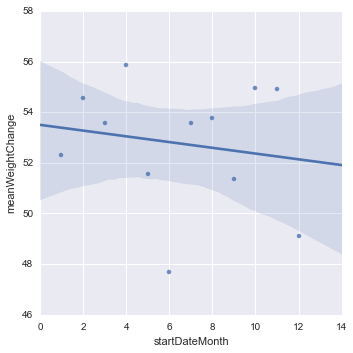

In [8]:
sns.lmplot(x='startDateMonth', y='meanWeightChange', data=weightLostByMonth)

We want to get an error for each month:

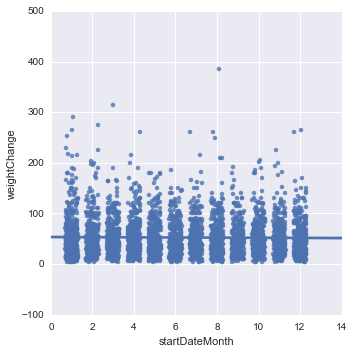

In [9]:
sns.lmplot(x='startDateMonth', y='weightChange', data=fullWeightLossData, x_jitter=0.3)

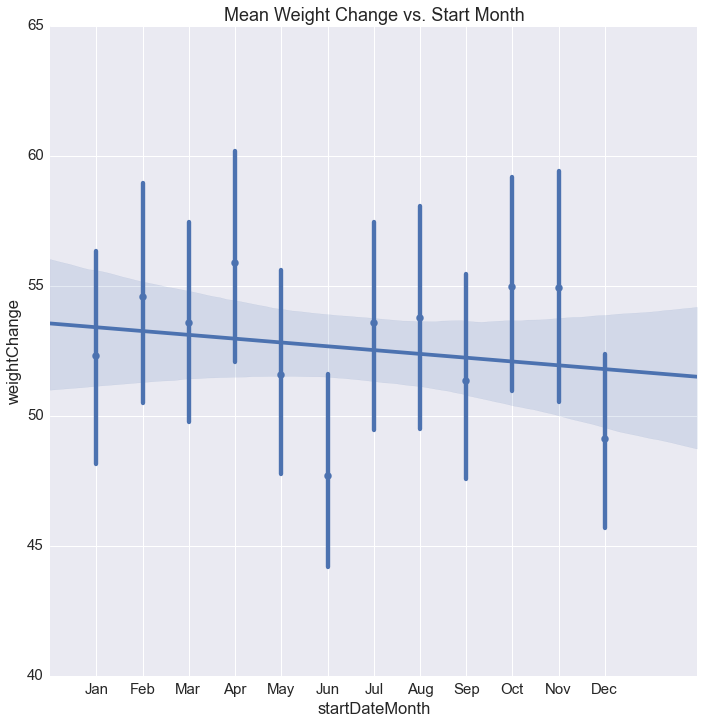

In [13]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

lmPlot2 = sns.lmplot(x='startDateMonth', y='weightChange', data=fullWeightLossData, x_estimator=np.mean, ci=95, size=10)
plt.gca().set_title('Mean Weight Change vs. Start Month')
plt.xticks(np.arange(1,13))
lmPlot2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

This shows people who start their weight loss in June lose significantly less weight than other months. There is a slight reduction in December, though it's not significant

Let's check if this is statistically significant

In [15]:
import scipy.stats
monthNames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for monthIndex in np.arange(1,13):
    print monthNames[monthIndex-1] + ': p =',
    print scipy.stats.ranksums(fullWeightLossData.ix[fullWeightLossData['startDateMonth'] == monthIndex,'weightChange'],fullWeightLossData.ix[fullWeightLossData['startDateMonth'] == 6,'weightChange'])[1]

Jan: p = 0.773538439655
Feb: p = 0.056263237922
Mar: p = 0.0528800905908
Apr: p = 0.000929542265061
May: p = 0.162020342208
Jun: p = 1.0
Jul: p = 0.0340806166769
Aug: p = 0.0999565710721
Sep: p = 0.0533556604634
Oct: p = 0.00181349873099
Nov: p = 0.00918402948731
Dec: p = 0.493596284551


In [22]:
print 0.05/12
for monthIndex in np.arange(1,13):
    print monthNames[monthIndex-1] + ': p =',
    print scipy.stats.ranksums(fullWeightLossData.ix[fullWeightLossData['startDateMonth'] != monthIndex,'weightChange'],fullWeightLossData.ix[fullWeightLossData['startDateMonth'] == monthIndex,'weightChange'])[1]

0.00416666666667
Jan: p = 0.0271333700729
Feb: p = 0.696985460845
Mar: p = 0.579025774328
Apr: p = 0.0220177107354
May: p = 0.65619712553
Jun: p = 0.0127192201794
Jul: p = 0.469515043304
Aug: p = 0.986314795874
Sep: p = 0.734374695929
Oct: p = 0.0516634835734
Nov: p = 0.158415535972
Dec: p = 0.0794291376827


(0, 150)

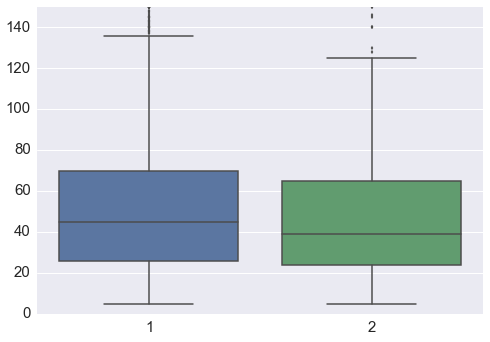

In [20]:
p = sns.boxplot([fullWeightLossData.ix[fullWeightLossData['startDateMonth'] != 6,'weightChange'],fullWeightLossData.ix[fullWeightLossData['startDateMonth'] == 6,'weightChange']])
plt.ylim([0,150])

Let's look to see the number of people who started their weight loss vs. month:

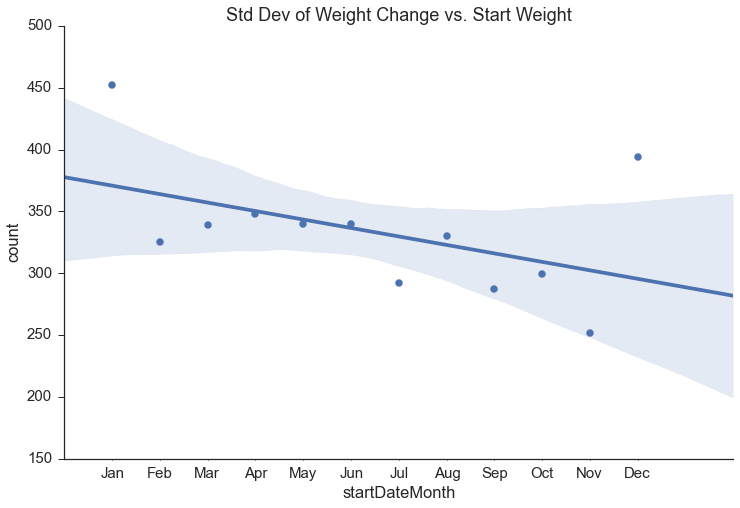

In [12]:
sns.set_style("ticks", {"xtick.major.size": 1})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
lmPlot = sns.lmplot('startDateMonth', 'count', data=weightLostByMonth, x_estimator=np.mean, size=7, aspect=1.5)

plt.gca().set_title('Std Dev of Weight Change vs. Start Weight')
plt.xticks(np.arange(1,13))
lmPlot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

This clearly shows that there is outliers during January and December

Let's make sure this isn't cause people just aren't spending as much time on their diet if they started in June:

In [13]:
fullWeightLossData.groupby(['startDateMonth'])['timeElapsedMonths'].mean()

lmPlot = sns.lmplot('startDateMonth', 'count', data=weightLostByMonth, x_estimator=np.mean, size=7, aspect=1.5)


startDateMonth
1                 10.968157
2                 12.195867
3                 13.942285
4                 13.828197
5                 12.552914
6                 12.506908
7                 12.871185
8                 12.639933
9                 11.699336
10                13.254498
11                14.722584
12                11.336328
Name: timeElapsedMonths, dtype: float64

In [15]:
fullWeightLossData.columns

Index([u'index', u'permalink', u'userText', u'name', u'author', u'url', u'num_comments', u'endWeight', u'title', u'created_utc', u'height', u'weightUnit', u'score', u'weightChange', u'over_18', u'timeElapsed', u'gender', u'timeUnit', u'startWeight', u'age', u'currentBMI', u'previousBMI', u'timeElapsedEpoch', u'timeElapsedMonths', u'weightChangeRate', u'username', u'fitnessCommentCount', u'totalCommentCount', u'fitnessCommentFraction', u'sentimentScores', u'startDateMonthName', u'startDateMonth'], dtype='object')

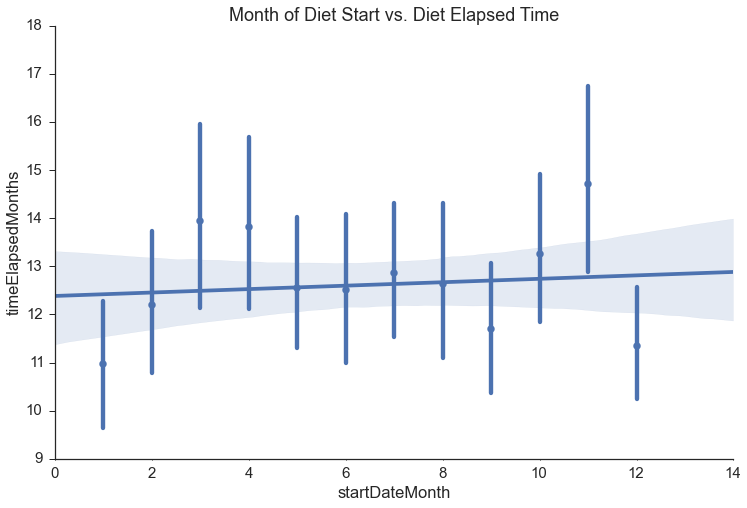

In [31]:
lmPlot = sns.lmplot('startDateMonth', 'timeElapsedMonths', data=fullWeightLossData, x_estimator=np.mean, size=7, aspect=1.5)
plt.gca().set_title('Month of Diet Start vs. Diet Elapsed Time')
